In [1]:
pip install imutils

  Created wheel for imutils: filename=imutils-0.5.3-py3-none-any.whl size=25850 sha256=a3e72f892e7765a5a4cbdba6e501f58b86ef9bac2f7b8bf1506133d6aaed989d
  Stored in directory: /root/.cache/pip/wheels/fc/9c/6d/1826267c72afa51b564c9c6e0f66abc806879338bc593a2270
Successfully built imutils
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import display
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from imutils import paths
import argparse
import imutils

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid19-radiography-database/COVID-19 Radiography Database/README.md.txt
/kaggle/input/covid19-radiography-database/COVID-19 Radiography Database/COVID-19.metadata.xlsx
/kaggle/input/covid19-radiography-database/COVID-19 Radiography Database/Viral Pneumonia.matadata.xlsx
/kaggle/input/covid19-radiography-database/COVID-19 Radiography Database/NORMAL.metadata.xlsx
/kaggle/input/covid19-radiography-database/COVID-19 Radiography Database/COVID-19/COVID-19 (106).png
/kaggle/input/covid19-radiography-database/COVID-19 Radiography Database/COVID-19/COVID-19 (30).png
/kaggle/input/covid19-radiography-database/COVID-19 Radiography Database/COVID-19/COVID-19 (79).png
/kaggle/input/covid19-radiography-database/COVID-19 Radiography Database/COVID-19/COVID-19 (29).png
/kaggle/input/covid19-radiography-database/COVID-19 Radiography Database/COVID-19/COVID-19 (107).png
/kaggle/input/covid19-radiography-database/COVID-19 Radiography Database/COVID-19/COVID-19 (3).png
/kaggle/input/covid

/kaggle/input/covid19-radiography-database/COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (1243).png
/kaggle/input/covid19-radiography-database/COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (1298).png
/kaggle/input/covid19-radiography-database/COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (1338).png
/kaggle/input/covid19-radiography-database/COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (154).png
/kaggle/input/covid19-radiography-database/COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (381).png
/kaggle/input/covid19-radiography-database/COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (996).png
/kaggle/input/covid19-radiography-database/COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (342).png
/kaggle/input/covid19-radiography-database/COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (992).png
/kaggle/input/covid19-radiography-database/COVID-19 Radiography Database/Vira

The following part of processing the images where the images are flattened and converted to color histograms are referred from the document "https://www.pyimagesearch.com/2016/08/08/k-nn-classifier-for-image-classification/". This link has been pu in the references of our paper.

In [4]:
def image_to_feature_vector(image, size=(32, 32)):
    # resize the image to a fixed size, then flatten the image into
    # a list of raw pixel intensities
    return cv2.resize(image, size).flatten()

In [5]:
def extract_color_histogram(image, bins=(8, 8, 8)):
    # extract a 3D color histogram from the HSV color space using
    # the supplied number of `bins` per channel
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hist = cv2.calcHist([hsv], [0, 1, 2], None, bins,[0, 180, 0, 256, 0, 256])
    
    if imutils.is_cv2():
        hist = cv2.normalize(hist)
    
    else:
        cv2.normalize(hist, hist)
    # return the flattened histogram as the feature vector
    return hist.flatten()

In [6]:
imagePaths = []

for dirname, _, filenames in os.walk('/kaggle/input/covid19-radiography-database/COVID-19 Radiography Database/'):
    for filename in filenames:
        if (filename[-3:] == 'png'):
            imagePaths.append(os.path.join(dirname, filename))

(1024, 1024, 3)


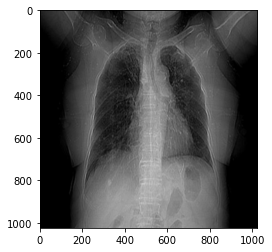

In [7]:
image = cv2.imread(imagePaths[0])
print(image.shape)
plt.imshow(image)
plt.show()

In [8]:
rawImages = []
features = []
labels = []
img=[]

for imagePath in imagePaths:
    label = imagePath.split(os.path.sep)[-2]
    image = cv2.imread(imagePath)
    # extract raw pixel intensity "features", followed by a color
    # histogram to characterize the color distribution of the pixels
    # in the image
    pixels = image_to_feature_vector(image)
    hist = extract_color_histogram(image)
    rawImages.append(pixels)
    features.append(hist)
    labels.append(label)
    img.append(image)
   
print(labels[0])

COVID-19


In [13]:
rawImages = np.array(rawImages)
features = np.array(features)
labels = np.array(labels)
print("[INFO] pixels matrix: {:.2f}MB".format(rawImages.nbytes / (1024 * 1000.0)))
print("[INFO] features matrix: {:.2f}MB".format(features.nbytes / (1024 * 1000.0)))

[INFO] pixels matrix: 8.71MB
[INFO] features matrix: 5.81MB


In [14]:
# splitting the data into training and testing splits, 75% for train and 25% for test
(trainRI, testRI, trainRL, testRL) = train_test_split(rawImages, labels, test_size=0.25)
(trainFeat, testFeat, trainLabels, testLabels) = train_test_split(features, labels, test_size=0.25)


In [15]:
print(trainRI.shape)
print(trainRL.shape)
print(testRI.shape)
print(testRL.shape)

(2178, 3072)
(2178,)
(727, 3072)
(727,)


**KNN Approach**

In [16]:
from sklearn.model_selection import StratifiedKFold
from statistics import mean
from sklearn.metrics import *
from sklearn import metrics
accavg=[]
recavg=[]
stratifiedcv= StratifiedKFold()
stratifiedcv.get_n_splits(rawImages, labels)
neighborsmatrix=[1,3,5,10,25]
for n in neighborsmatrix:
    accraw2=[]
    recraw2=[]
    for train_ix, test_ix in stratifiedcv.split(rawImages, labels):
        trainRI2, testRI2 = rawImages[train_ix], rawImages[test_ix]
        trainRL2, testRL2 = labels[train_ix], labels[test_ix]
       
        model2 = KNeighborsClassifier(n_neighbors=n)
        model2.fit(trainRI2, trainRL2)
        acc = model2.score(testRI2, testRL2)
        yhat=model2.predict(testRI2)
        accround=round(acc,2)
        
        #print("Raw pixel accuracy is: {:.2f}%".format(acc * 100))
        #print(accraw2)
        accuracy=accuracy_score(testRL2, yhat)
        recall= recall_score(testRL2, yhat, average='macro')
        recraw2.append(recall*100)
        accraw2.append(accuracy*100)
        #precision=precision_score(testRL2, yhat)
        #recall=recall_score(testRL2, yhat)
        #f1=f1_score(testRL2, yhat)
        #print("for neighbours = ", n)
        #print("accuracy = ", accuracy, "precision = ", precision, "recall = ", recall, "f1-measure = ", f1)
        #print(metrics.classification_report(testRL2, yhat, digits=3))
    avg=mean(accraw2)
    accavg.append(avg)
    recavg.append(mean(recraw2))
print(accavg)
print(recavg)


[87.29776247848537, 89.25989672977624, 88.98450946643717, 89.53528399311531, 88.74354561101549]
[85.7450750913884, 87.15687264691185, 84.1672571931324, 83.41521797552785, 79.28122792124088]


In [17]:
figx = plt.figure(figsize =(9, 6))
plt.plot(neighborsmatrix,accavg)
plt.xlabel('neighbors')
plt.ylabel('average accuracies')
plt.title('Raw pixel accuracy wrt different K values ')
plt.show()

SyntaxError: invalid syntax (<ipython-input-17-11c781ac4dfc>, line 6)

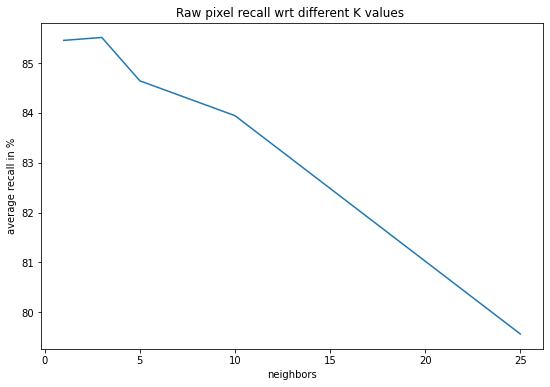

In [13]:
figx2 = plt.figure(figsize =(9, 6))
plt.plot(neighborsmatrix,recavg)
plt.xlabel('neighbors')
plt.ylabel('average recall in %')
plt.title('Raw pixel recall wrt different K values ')
plt.show()

**Raw pixel accuracies without 5 fold cross validation**

In [14]:
accraw=[]
neighborsmatrix=[1,3,5,10,25]
for n in neighborsmatrix:
    model = KNeighborsClassifier(n_neighbors=n)
    model.fit(trainRI, trainRL)
    acc = model.score(testRI, testRL)
    accround=round(acc,2)
    accraw.append(accround)
    print("Raw pixel accuracy is: {:.2f}%".format(acc * 100))

Raw pixel accuracy is: 85.83%
Raw pixel accuracy is: 88.17%
Raw pixel accuracy is: 88.17%
Raw pixel accuracy is: 88.17%
Raw pixel accuracy is: 86.66%


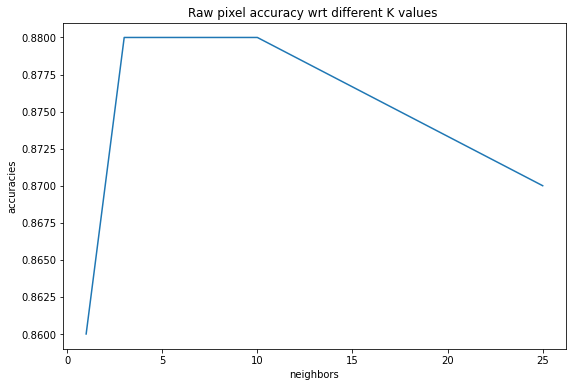

In [15]:
fig1 = plt.figure(figsize =(9, 6))
plt.plot(neighborsmatrix,accraw)
plt.xlabel('neighbors')
plt.ylabel('accuracies')
plt.title('Raw pixel accuracy wrt different K values ')
plt.show()
#plt.plot(neighborsmatrix,accraw)

In [16]:
accavg2=[]
recavg2=[]
stratifiedcv= StratifiedKFold()
stratifiedcv.get_n_splits(features, labels)
for n in neighborsmatrix:
    acchist2=[]
    rechist2=[]
    for train_ix, test_ix in stratifiedcv.split(features, labels):
        trainFeat2, testFeat2 = features[train_ix], features[test_ix]
        trainLabels2, testLabels2 = labels[train_ix], labels[test_ix]
        model3 = KNeighborsClassifier(n_neighbors=n)
        model3.fit(trainFeat2, trainLabels2)
        acc = model3.score(testFeat2, testLabels2)
        yhat=model3.predict(testFeat2)
        accuracy=accuracy_score(testLabels2, yhat)
        recall= recall_score(testLabels2, yhat, average='macro')
        rechist2.append(recall*100)
        acchist2.append(accuracy*100)
        
    avg=mean(acchist2)
    accavg2.append(avg)
    recavg2.append(mean(rechist2))
print(accavg2)
print(recavg2)

[76.62650602409639, 77.62478485370052, 78.79518072289157, 78.7263339070568, 78.24440619621342]
[72.8488637003919, 69.37112988153068, 68.81190825895203, 65.83404917927085, 61.65907261948625]


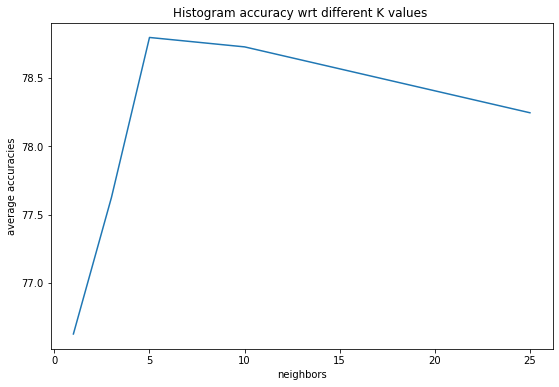

In [17]:
figy = plt.figure(figsize =(9, 6))
plt.plot(neighborsmatrix,accavg2)
plt.xlabel('neighbors')
plt.ylabel('average accuracies')
plt.title('Histogram accuracy wrt different K values ')
plt.show()

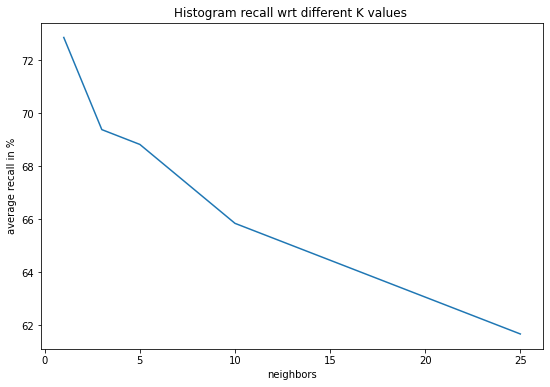

In [18]:
figy2 = plt.figure(figsize =(9, 6))
plt.plot(neighborsmatrix,recavg2)
plt.xlabel('neighbors')
plt.ylabel('average recall in %')
plt.title('Histogram recall wrt different K values ')
plt.show()

Histogram accuracies without using 5-fold cross validation

In [19]:
acchist=[]
neighborsmatrix=[1,3,5,10,25]
for n in neighborsmatrix:
    model = KNeighborsClassifier(n_neighbors=n)
    model.fit(trainFeat, trainLabels)
    acc = model.score(testFeat, testLabels)
    accround=round(acc,2)
    acchist.append(accround)
    print("Histogram accuracy is : {:.2f}%".format(acc * 100))

Histogram accuracy is : 74.97%
Histogram accuracy is : 77.03%
Histogram accuracy is : 78.82%
Histogram accuracy is : 79.64%
Histogram accuracy is : 79.23%


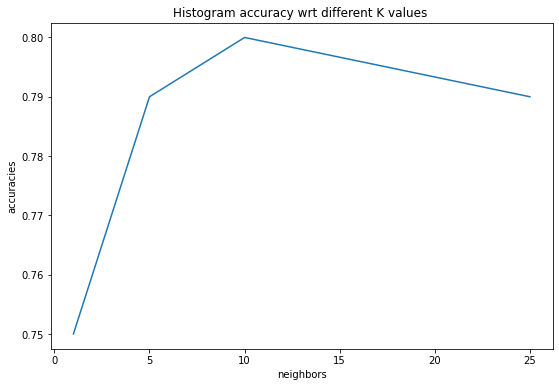

In [20]:
fig2 = plt.figure(figsize =(9, 6))
plt.plot(neighborsmatrix,acchist)
plt.xlabel('neighbors')
plt.ylabel('accuracies')
plt.title('Histogram accuracy wrt different K values ')
plt.show()